### Logistic Regression Case Study on -

### Lead Scoring

#### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

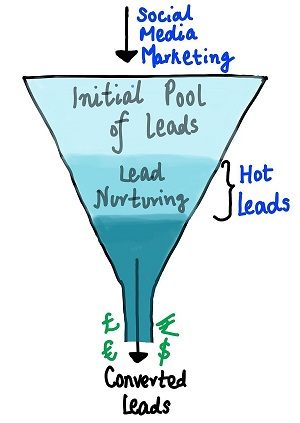

                           Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

#### Goal
- There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [281]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [282]:
# Load the dataset

lead = pd.read_csv('Leads.csv',header=0)

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [283]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


## Data Inspection

In [284]:
# inspecting the number of rows and columns

print("Total number of rows:", lead.shape[0])
print("Total number of columns:",lead.shape[1])

Total number of rows: 9240
Total number of columns: 37


In [285]:
# Let's take a look at the datatypes of all the columns

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [286]:
# Initial quantitative inspection of the columns

lead.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


## Data Cleaning

In [287]:
# There are some null values in the daataset but are portrayed as SELECT. We need to first convert them into null values

lead = lead.replace('Select',np.NaN,regex=True)

In [288]:
# Checking for null values

lead.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [289]:
# Null values in percentages

round((100 * lead.isna().sum())/len(lead.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [290]:
# Get the columns with more than 40% null values

nulls = round((100 * lead.isna().sum())/len(lead.index),2)>=40
null_40 = nulls[nulls == True].index

In [291]:
# Dropping those columns

lead.drop(columns=null_40,inplace=True)

In [292]:
# Check for null values after removing the columns

round((100 * lead.isna().sum())/len(lead.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

'Country' column

In [293]:
# Let's see the values in country columns

round(lead['Country'].value_counts(normalize=True)*100,2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

In [294]:
# In country column India constitues of 95% of the values in the column, and rest of the countries constitues less than 1%. 
# hence it is safe to impute india for the missing values

lead['Country'] = lead['Country'].replace(np.NaN,'India',regex=True)

City column

In [295]:
round(lead['City'].value_counts(normalize=True)*100,2)

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

In [296]:
# Since almost 58% percent values are Mumbai, we can impute the same for our null values

lead['City'] = lead['City'].replace(np.NaN,'Mumbai',regex=True)

'What matters most to you in choosing a course' column

In [297]:
round(lead['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

In [298]:
# Since Better Many professionals are looking for career prospects according to this column, 
# we can impute the same for the missing values

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.NaN,'Better Career Prospects',regex=True)

'What is your current occupation' column

In [299]:
round(lead['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

In [300]:
# As we can see almost 86% of the people coming to this websites are unemployed which makes sense as they are probably 
# looking for career transitions or just upskilling themseleves. Hence we can impute the missing values as unemployed

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.NaN,'Unemployed',regex=True)

'Specialization' column

In [301]:
round(lead['Specialization'].value_counts(normalize=True)*100,2)

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

In [302]:
# Now specialization column can be left empty as students and unemployed will not be working. 
# So let's make a seperate column for the null values

lead['Specialization'] = lead['Specialization'].replace(np.NaN,'Others',regex=True)

In [303]:
# Last activity, Page vies per visit and TotalVisits have null values of only 1 to 1.5%. 
# since all the values in the columns have almost equal number of values. The best method is drop them from the dataset

lead = lead[~lead['Lead Source'].isna()]
lead = lead[~lead['Last Activity'].isna()]
lead = lead[~lead['Page Views Per Visit'].isna()]
lead = lead[~lead['TotalVisits'].isna()]

Tags column

In [304]:
round(lead['Tags'].value_counts(normalize=True)*100,2)

Will revert after reading the email                  35.08
Ringing                                              20.65
Interested in other courses                           8.86
Already a student                                     8.09
Closed by Horizzon                                    5.24
switched off                                          4.18
Busy                                                  3.22
Lost to EINS                                          2.99
Not doing further education                           2.52
Interested  in full time MBA                          2.02
Graduation in progress                                1.93
invalid number                                        1.44
Diploma holder (Not Eligible)                         1.10
wrong number given                                    0.82
opp hangup                                            0.57
number not provided                                   0.44
in touch with EINS                                    0.

In [305]:
# The column does not look like it can be left blank so we cannot make a seperate column. 
# and it has almost 36% of missing values. So we cannot drop them
# It is better to impute them with Will revert after reading the email

lead['Tags'] = lead['Tags'].replace(np.NaN,'Will revert after reading the email')

In [306]:
lead.isna().sum()    # Now there are no missing values

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

## Handling Outliers

TotalVisits column

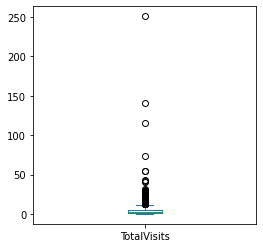

In [307]:
# Let's visualize the column
plt.figure(figsize = [4,4])
lead['TotalVisits'].plot.box()
plt.show()

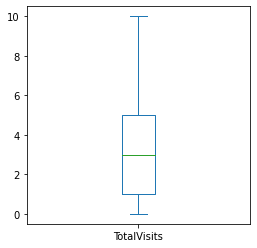

In [308]:
# Since there are a lot of outliers, we can cap them

percentiles = lead['TotalVisits'].quantile([0.05, 0.95]).values
lead['TotalVisits'][lead['TotalVisits']<=percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits']>=percentiles[1]] = percentiles[1]

# After capping
plt.figure(figsize = [4,4])
lead['TotalVisits'].plot.box()
plt.show()

Page Views Per Visit

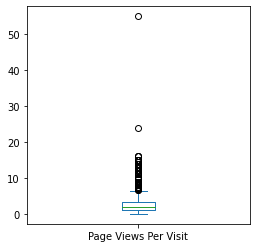

In [309]:
plt.figure(figsize=[4,4])
lead['Page Views Per Visit'].plot.box()
plt.show()

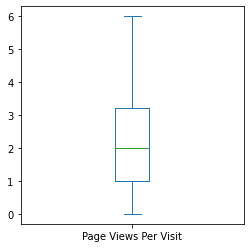

In [310]:
# Since there are a lot of outliers, we can cap them

percentile_2 = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit']<=percentile_2[0]] = percentile_2[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit']>=percentile_2[1]] = percentile_2[1]

# After capping
plt.figure(figsize=[4,4])
lead['Page Views Per Visit'].plot.box()
plt.show()

## Visualizing the data

#### Univariate Analysis

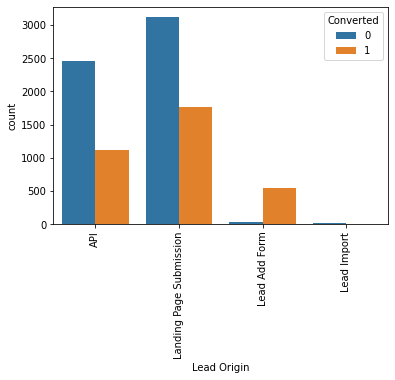

In [311]:
sns.countplot(data=lead, x='Lead Origin',hue='Converted')
plt.xticks(rotation=90)
plt.show()

- Very high conversion rate among the lead add form

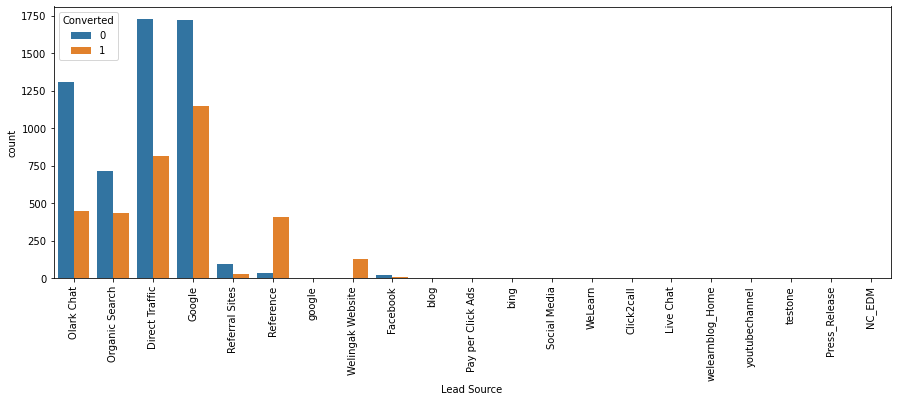

In [312]:
plt.figure(figsize=[15,5])
sns.countplot(data=lead,x='Lead Source',hue='Converted')
plt.xticks(rotation=90)
plt.show()

- Very high conversion rate in the reference and welingak website

Last Activity

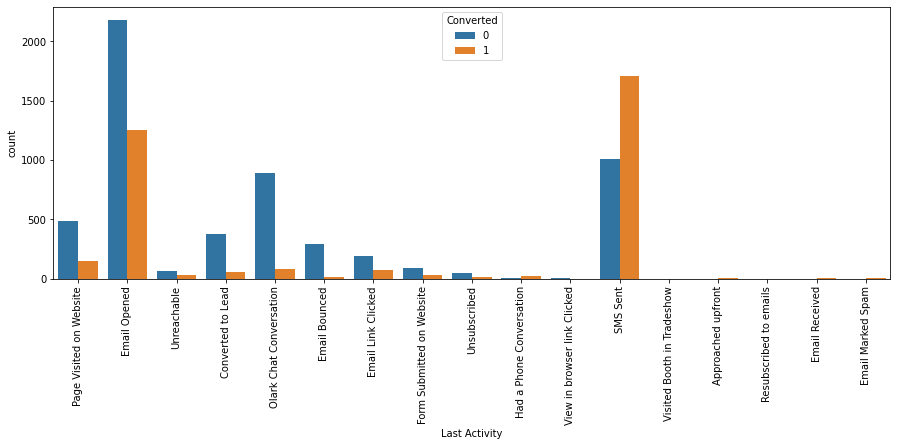

In [313]:
plt.figure(figsize=[15,5])
sns.countplot(data=lead,x='Last Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

- Poeple who have spent their last activity as SMS sent have highest conversion rate 

Specialization

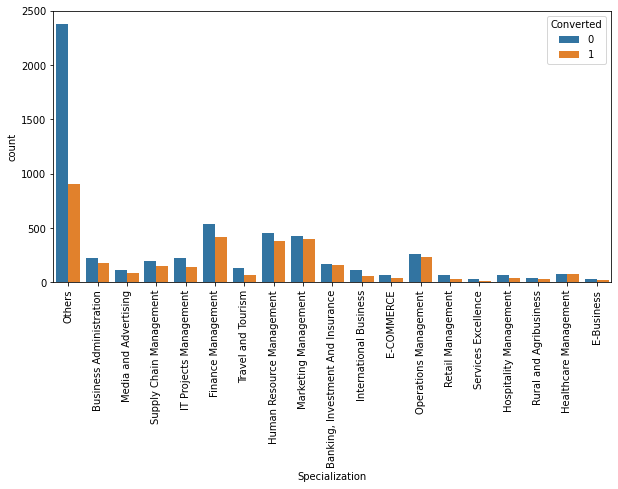

In [314]:
plt.figure(figsize=[10,5])
sns.countplot(data=lead,x='Specialization',hue='Converted')
plt.xticks(rotation=90)
plt.show()

- We can observe balanced conversion rate in the Human Resouce management, marketing management and Banking investment and insurance

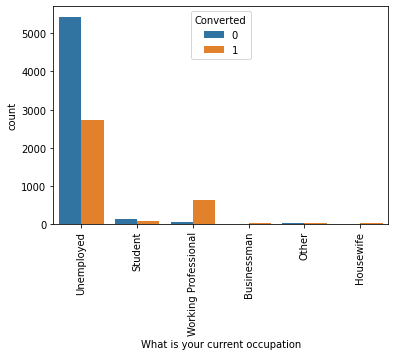

In [315]:
sns.countplot(data=lead,x='What is your current occupation',hue='Converted')
plt.xticks(rotation=90)
plt.show()

- Working professionals have high conversion rate

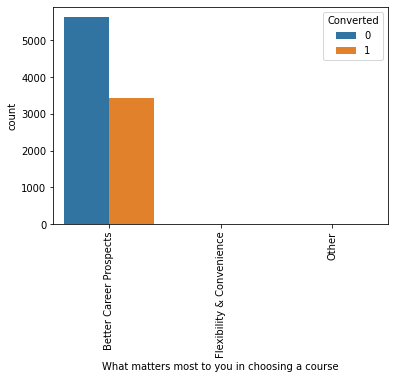

In [316]:
sns.countplot(data=lead,x='What matters most to you in choosing a course',hue='Converted')
plt.xticks(rotation=90)
plt.show()

- No inference can be made

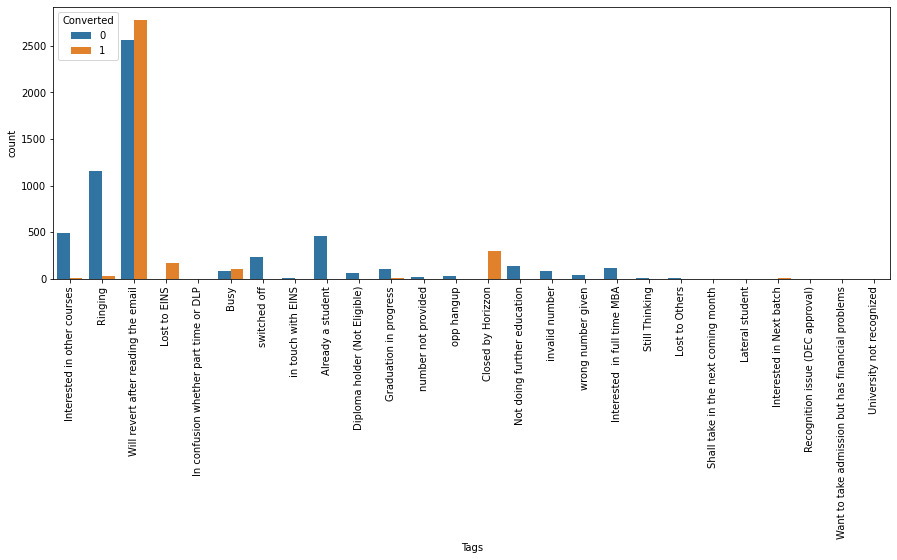

In [317]:
plt.figure(figsize=[15,5])
sns.countplot(data=lead,x='Tags',hue='Converted')
plt.xticks(rotation=90)
plt.show()

- We can target 'will revert after the email, Lost to EINS, Busy and Closed by Horizzon as they have high conversion rates

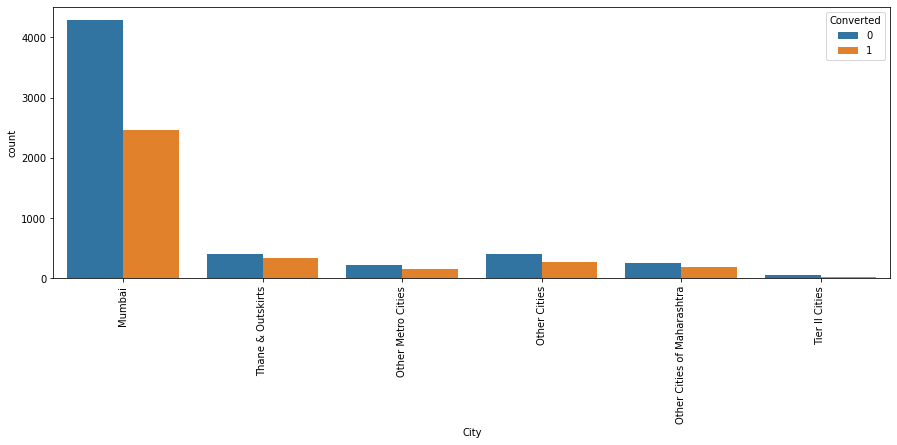

In [318]:
plt.figure(figsize=[15,5])
sns.countplot(data=lead,x='City',hue='Converted')
plt.xticks(rotation=90)
plt.show()

No Inference can be drawn with this parameter.

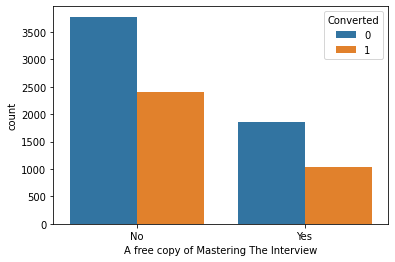

In [319]:
sns.countplot(data=lead,x='A free copy of Mastering The Interview',hue='Converted')
plt.show()

No Inference can be drawn with this parameter.

We can see that there are a lot of unncessary columns that are not relevant. Let's drop them

In [320]:
cols = ['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
        'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
        'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
        'A free copy of Mastering The Interview','Do Not Call','What matters most to you in choosing a course']

lead.drop(columns=cols,inplace=True)

## Data Preparation

In [321]:
# Let's replace Yes as 1 and No as 0 in the Do Not Email column

lead["Do Not Email"] = lead["Do Not Email"].map({'Yes':1, "No":0})

In [322]:
lead['Lead Source'] = lead['Lead Source'].apply(lambda x : 'Google' if x=='google' else x)

In [323]:
# Let's create dummy variables

dummys = ['Lead Origin','Lead Source','Last Activity','Specialization',
          'What is your current occupation',
          'City','Last Notable Activity']

dummy_df = pd.get_dummies(lead[dummys],drop_first = True)

dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [324]:
# Let's concatenate the dummy variables to our main dataset

new_lead = pd.concat([lead,dummy_df],axis=1)

In [325]:
# Now that we have concatenated the dummy variables, we can remove them from the original dataset

new_lead.drop(columns=dummys,inplace=True)

### Defining X and Y variables

In [326]:
# Defining X variable

X = new_lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [327]:
# Defining y variable

y = new_lead['Converted']

## 4. Test-Train Split

In [406]:
# Import the required library
from sklearn.model_selection import train_test_split

In [407]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [408]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0,0.2,0.612676,0.333333,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3604,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5584,1,0.6,0.751761,1.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7679,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7563,1,0.2,0.787852,0.333333,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [409]:
print(X.shape)
print(y.shape)

(9074, 85)
(9074,)


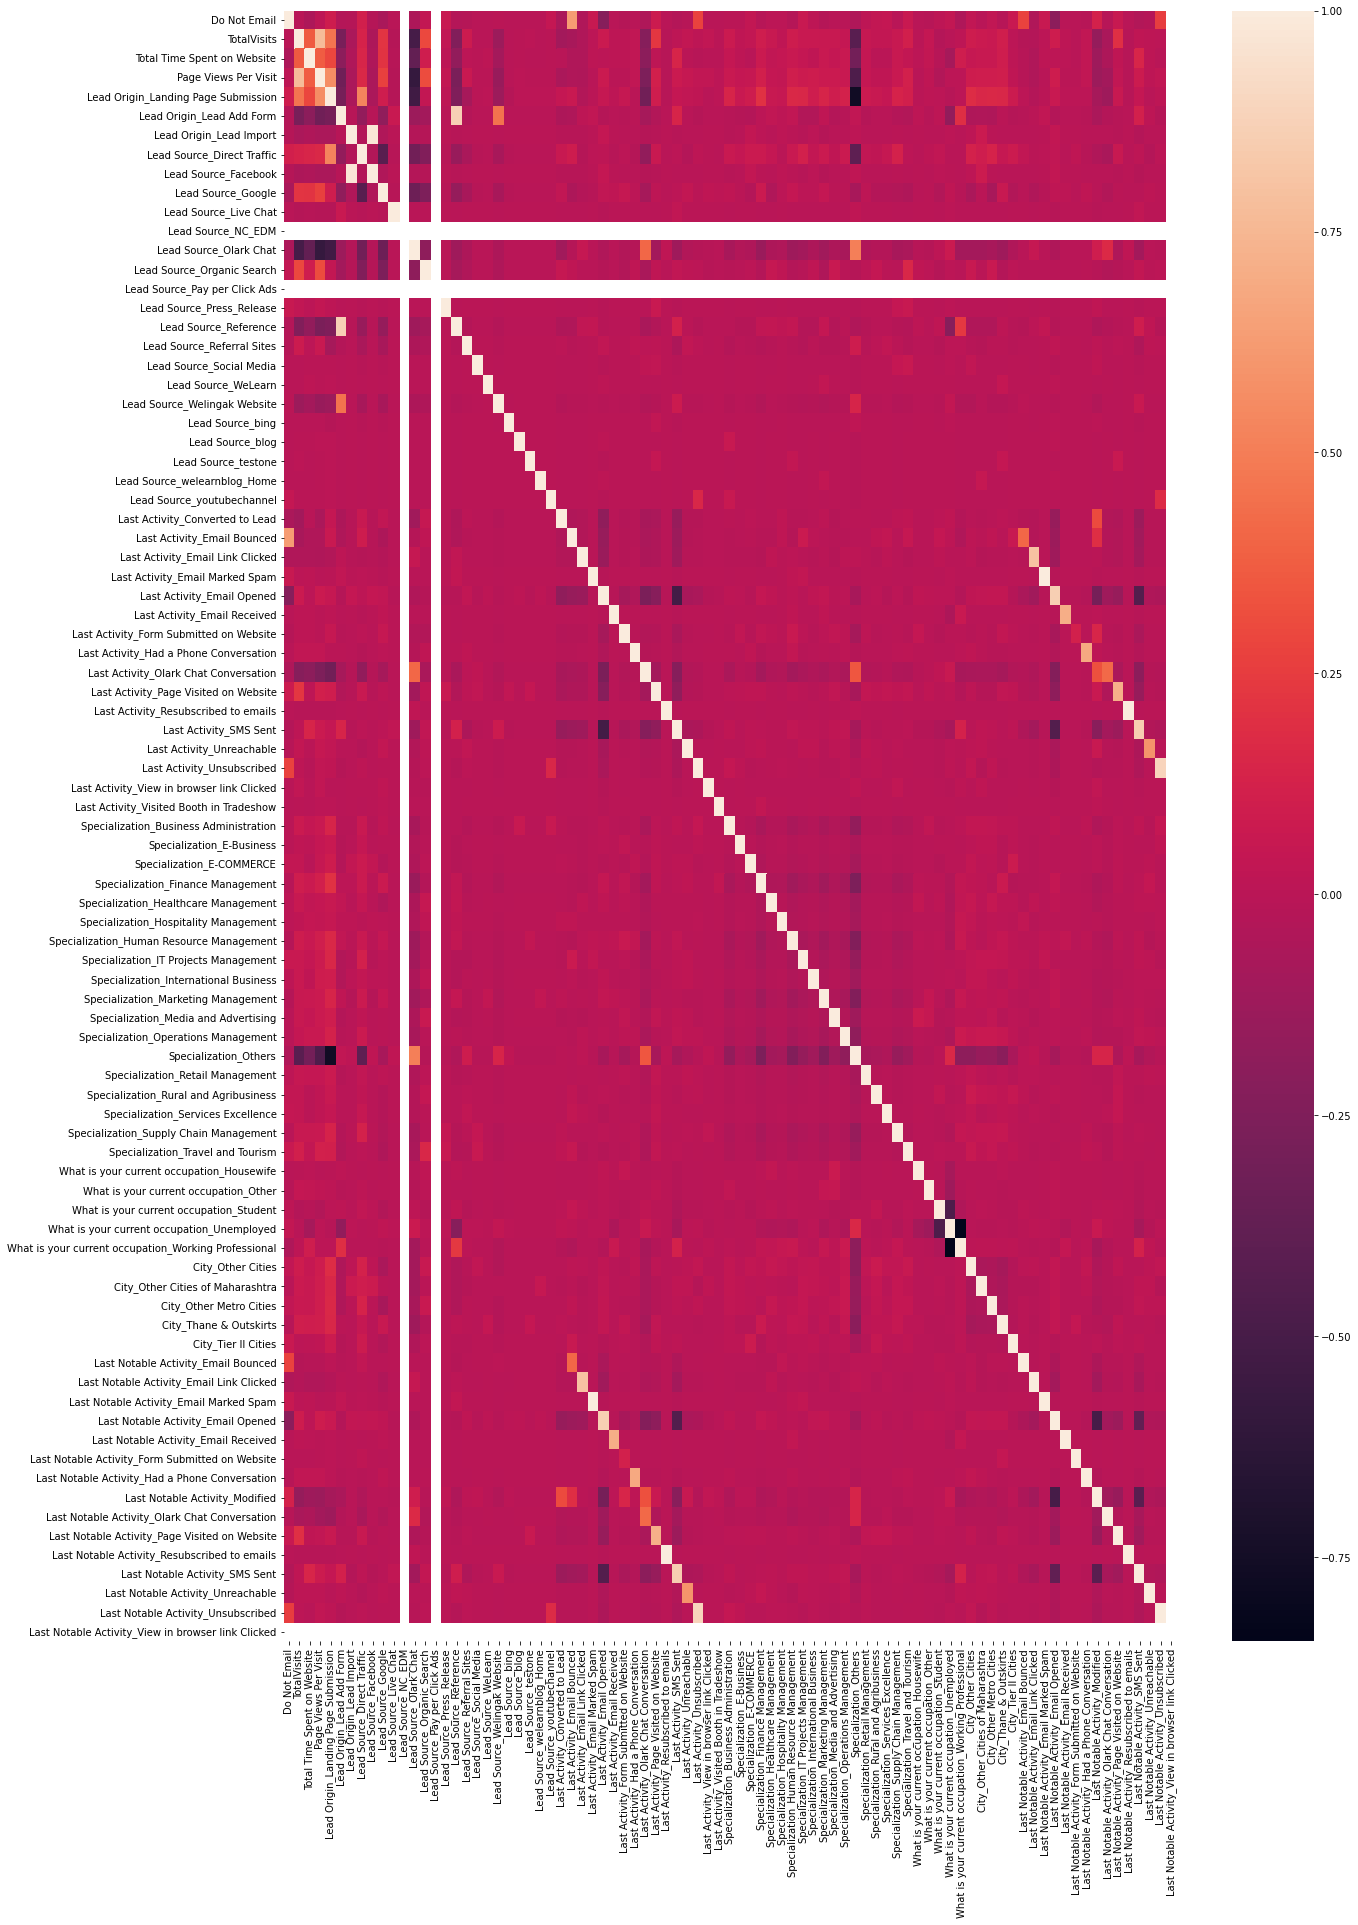

In [410]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

<font color= green>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## 5. Model Building 

In [411]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [412]:
# Import RFE
from sklearn.feature_selection import RFE

In [413]:
# Running RFE with 20 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=17)
rfe = rfe.fit(X_train, y_train)

In [414]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 36),
 ('Lead Source_NC_EDM', False, 67),
 ('Lead Source_Olark Chat', False, 20),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 68),
 ('Lead Source_Press_Release', False, 34),
 ('Lead Source_Reference', False, 19),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 21),
 ('Lead Source_WeLearn', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 32),
 ('Lead Source_blog', False, 27),
 ('Lead Source_testone', False, 37),
 ('Lead Source_welearnblog_Home', False, 31),
 ('Lead Source

In [415]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [416]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [417]:
# Importing statsmodels
import statsmodels.api as sm

In [418]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.4
Date:                Tue, 15 Aug 2023   Deviance:                       5382.9
Time:                        19:05:30   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3855
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0713      0.090      0.795      0.427      -0.104       0.247
Do Not Email                                            -1.6668      0.175     -9.533      0.000      -2.009      -1.324
TotalVisits                                              1.1169      0.192      5.815      0.000       0.740       1.493
Total Time Spent on Website                              4.2706      0.157     27.206      0.000       3.963       4.578
Page Views Per Visit                                    -1.8120      0.187     -9.711      0.000      -2.178      -1.446
Lead Origin_Lead Add Form                                3.1146      0.224     13.896      0.000       2.675       3.554
Lead Source_Direct Traffic                              -0.5248      0.078     -6.733      0.000      -0.678      -0.372
Lead Source_Referral Sites                              -0.3027      0.305     -0.994      0.320      -0.900       0.294
Lead Source_Welingak Website                             2.6937      1.038      2.596      0.009       0.660       4.728
Last Activity_Had a Phone Conversation                   1.5111      0.709      2.131      0.033       0.121       2.901
Last Activity_Olark Chat Conversation                   -1.0361      0.192     -5.408      0.000      -1.412      -0.661
What is your current occupation_Housewife               21.9513   1.17e+04      0.002      0.998   -2.28e+04    2.29e+04
What is your current occupation_Working Professional     2.7644      0.195     14.207      0.000       2.383       3.146
Last Notable Activity_Email Link Clicked                -1.9698      0.276     -7.125      0.000      -2.512      -1.428
Last Notable Activity_Email Opened                      -1.4037      0.087    -16.087      0.000      -1.575      -1.233
Last Notable Activity_Modified                          -1.9261      0.096    -20.054      0.000      -2.114      -1.738
Last Notable Activity_Olark Chat Conversation           -1.8301      0.383     -4.784      0.000      -2.580      -1.080
Last Notable Activity_Page Visited on Website           -2.0373      0.207     -9.832      0.000      -2.443      -1.631
========================================================================================================================
"""

In [419]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [420]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.60
1,TotalVisits,6.36
2,Total Time Spent on Website,2.08
14,Last Notable Activity_Modified,1.90
9,Last Activity_Olark Chat Conversation,1.71
13,Last Notable Activity_Email Opened,1.56
5,Lead Source_Direct Traffic,1.47
4,Lead Origin_Lead Add Form,1.46
15,Last Notable Activity_Olark Chat Conversation,1.35
7,Lead Source_Welingak Website,1.31


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'___</font>

In [421]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [422]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.4
Date:                Tue, 15 Aug 2023   Deviance:                       5382.9
Time:                        19:05:31   Pearson chi2:                 6.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3855
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0713      0.090      0.795      0.427      -0.104       0.247
Do Not Email                                            -1.6668      0.175     -9.533      0.000      -2.009      -1.324
TotalVisits                                              1.1169      0.192      5.815      0.000       0.740       1.493
Total Time Spent on Website                              4.2706      0.157     27.206      0.000       3.963       4.578
Page Views Per Visit                                    -1.8120      0.187     -9.711      0.000      -2.178      -1.446
Lead Origin_Lead Add Form                                3.1146      0.224     13.896      0.000       2.675       3.554
Lead Source_Direct Traffic                              -0.5248      0.078     -6.733      0.000      -0.678      -0.372
Lead Source_Referral Sites                              -0.3027      0.305     -0.994      0.320      -0.900       0.294
Lead Source_Welingak Website                             2.6937      1.038      2.596      0.009       0.660       4.728
Last Activity_Had a Phone Conversation                   1.5111      0.709      2.131      0.033       0.121       2.901
Last Activity_Olark Chat Conversation                   -1.0361      0.192     -5.408      0.000      -1.412      -0.661
What is your current occupation_Housewife               21.9513   1.17e+04      0.002      0.998   -2.28e+04    2.29e+04
What is your current occupation_Working Professional     2.7644      0.195     14.207      0.000       2.383       3.146
Last Notable Activity_Email Link Clicked                -1.9698      0.276     -7.125      0.000      -2.512      -1.428
Last Notable Activity_Email Opened                      -1.4037      0.087    -16.087      0.000      -1.575      -1.233
Last Notable Activity_Modified                          -1.9261      0.096    -20.054      0.000      -2.114      -1.738
Last Notable Activity_Olark Chat Conversation           -1.8301      0.383     -4.784      0.000      -2.580      -1.080
Last Notable Activity_Page Visited on Website           -2.0373      0.207     -9.832      0.000      -2.443      -1.631
========================================================================================================================
"""

In [423]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.60
1,TotalVisits,6.36
2,Total Time Spent on Website,2.08
14,Last Notable Activity_Modified,1.90
9,Last Activity_Olark Chat Conversation,1.71
13,Last Notable Activity_Email Opened,1.56
5,Lead Source_Direct Traffic,1.47
4,Lead Origin_Lead Add Form,1.46
15,Last Notable Activity_Olark Chat Conversation,1.35
7,Lead Source_Welingak Website,1.31


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'___</font>

In [424]:
X_train.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)

In [425]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.9
Date:                Tue, 15 Aug 2023   Deviance:                       5391.8
Time:                        19:05:32   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3846
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0723      0.090      0.806      0.420      -0.103       0.248
Do Not Email                                            -1.6684      0.175     -9.544      0.000      -2.011      -1.326
TotalVisits                                              1.1151      0.192      5.809      0.000       0.739       1.491
Total Time Spent on Website                              4.2708      0.157     27.221      0.000       3.963       4.578
Page Views Per Visit                                    -1.8123      0.186     -9.719      0.000      -2.178      -1.447
Lead Origin_Lead Add Form                                3.1209      0.224     13.934      0.000       2.682       3.560
Lead Source_Direct Traffic                              -0.5250      0.078     -6.742      0.000      -0.678      -0.372
Lead Source_Referral Sites                              -0.3058      0.304     -1.004      0.315      -0.902       0.291
Lead Source_Welingak Website                             2.6836      1.038      2.586      0.010       0.650       4.717
Last Activity_Had a Phone Conversation                   1.5085      0.709      2.128      0.033       0.119       2.898
Last Activity_Olark Chat Conversation                   -1.0408      0.192     -5.434      0.000      -1.416      -0.665
What is your current occupation_Working Professional     2.7610      0.195     14.190      0.000       2.380       3.142
Last Notable Activity_Email Link Clicked                -1.9703      0.276     -7.126      0.000      -2.512      -1.428
Last Notable Activity_Email Opened                      -1.3986      0.087    -16.039      0.000      -1.570      -1.228
Last Notable Activity_Modified                          -1.9217      0.096    -20.027      0.000      -2.110      -1.734
Last Notable Activity_Olark Chat Conversation           -1.8255      0.382     -4.773      0.000      -2.575      -1.076
Last Notable Activity_Page Visited on Website           -2.0368      0.207     -9.829      0.000      -2.443      -1.631
========================================================================================================================
"""

In [426]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.60
1,TotalVisits,6.36
2,Total Time Spent on Website,2.08
13,Last Notable Activity_Modified,1.90
9,Last Activity_Olark Chat Conversation,1.71
12,Last Notable Activity_Email Opened,1.56
5,Lead Source_Direct Traffic,1.47
4,Lead Origin_Lead Add Form,1.46
14,Last Notable Activity_Olark Chat Conversation,1.35
7,Lead Source_Welingak Website,1.31


In [427]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.9
Date:                Tue, 15 Aug 2023   Deviance:                       5391.8
Time:                        19:05:33   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3846
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0723      0.090      0.806      0.420      -0.103       0.248
Do Not Email                                            -1.6684      0.175     -9.544      0.000      -2.011      -1.326
TotalVisits                                              1.1151      0.192      5.809      0.000       0.739       1.491
Total Time Spent on Website                              4.2708      0.157     27.221      0.000       3.963       4.578
Page Views Per Visit                                    -1.8123      0.186     -9.719      0.000      -2.178      -1.447
Lead Origin_Lead Add Form                                3.1209      0.224     13.934      0.000       2.682       3.560
Lead Source_Direct Traffic                              -0.5250      0.078     -6.742      0.000      -0.678      -0.372
Lead Source_Referral Sites                              -0.3058      0.304     -1.004      0.315      -0.902       0.291
Lead Source_Welingak Website                             2.6836      1.038      2.586      0.010       0.650       4.717
Last Activity_Had a Phone Conversation                   1.5085      0.709      2.128      0.033       0.119       2.898
Last Activity_Olark Chat Conversation                   -1.0408      0.192     -5.434      0.000      -1.416      -0.665
What is your current occupation_Working Professional     2.7610      0.195     14.190      0.000       2.380       3.142
Last Notable Activity_Email Link Clicked                -1.9703      0.276     -7.126      0.000      -2.512      -1.428
Last Notable Activity_Email Opened                      -1.3986      0.087    -16.039      0.000      -1.570      -1.228
Last Notable Activity_Modified                          -1.9217      0.096    -20.027      0.000      -2.110      -1.734
Last Notable Activity_Olark Chat Conversation           -1.8255      0.382     -4.773      0.000      -2.575      -1.076
Last Notable Activity_Page Visited on Website           -2.0368      0.207     -9.829      0.000      -2.443      -1.631
========================================================================================================================
"""

In [428]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.60
1,TotalVisits,6.36
2,Total Time Spent on Website,2.08
13,Last Notable Activity_Modified,1.90
9,Last Activity_Olark Chat Conversation,1.71
12,Last Notable Activity_Email Opened,1.56
5,Lead Source_Direct Traffic,1.47
4,Lead Origin_Lead Add Form,1.46
14,Last Notable Activity_Olark Chat Conversation,1.35
7,Lead Source_Welingak Website,1.31


<font color= green>___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___</font>

## 6. Creating Prediction

In [352]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.712847
3604    0.122985
5584    0.615694
7679    0.130329
7563    0.369558
7978    0.913314
7780    0.134490
7863    0.988773
838     0.799624
708     0.172563
dtype: float64

In [353]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71284734, 0.12298467, 0.61569427, 0.13032915, 0.3695581 ,
       0.91331437, 0.13448966, 0.98877326, 0.79962399, 0.1725629 ])

In [354]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.712847
1,0,0.122985
2,0,0.615694
3,0,0.130329
4,0,0.369558


In [355]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.712847,1
1,0,0.122985,0
2,0,0.615694,1
3,0,0.130329,0
4,0,0.369558,0


## 7. Model Evaluation

In [356]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [357]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3412,  483],
       [ 708, 1748]], dtype=int64)

In [358]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [359]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.812470477090222

<font color= green>___That's around 81% accuracy with is a very good value___</font>

In [360]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [361]:
# Calculating the sensitivity
TP/(TP+FN)

0.7117263843648208

In [362]:
# Calculating the specificity
TN/(TN+FP)

0.87599486521181

<font color= green>___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.___</font>

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [363]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [364]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

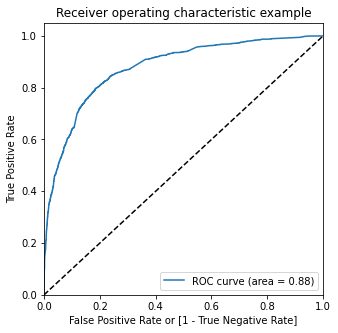

In [365]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.87 which is a very good value.___</font>

In [366]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.712847,1,1,1,1,1,1,1,1,1,0,0
1,0,0.122985,0,1,1,0,0,0,0,0,0,0,0
2,0,0.615694,1,1,1,1,1,1,1,1,0,0,0
3,0,0.130329,0,1,1,0,0,0,0,0,0,0,0
4,0,0.369558,0,1,1,1,1,0,0,0,0,0,0


In [367]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.570461,0.971498,0.317587
0.2,0.2,0.732641,0.912052,0.619512
0.3,0.3,0.794678,0.834691,0.769448
0.4,0.4,0.809006,0.776059,0.829782
0.5,0.5,0.812470,0.711726,0.875995
0.6,0.6,0.790742,0.583062,0.921694
0.7,0.7,0.776571,0.504479,0.948139
0.8,0.8,0.750118,0.400651,0.970475
0.9,0.9,0.709967,0.265879,0.989987


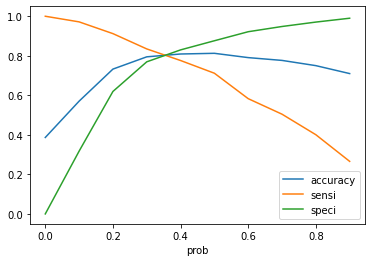

In [368]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= green>___From the graph it is visible that the optimal cut off is at 0.35.___</font>

In [369]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.712847,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.122985,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.615694,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.130329,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.369558,0,1,1,1,1,0,0,0,0,0,0,1


In [370]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8033380569988978

In [371]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3118,  777],
       [ 472, 1984]], dtype=int64)

In [372]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [373]:
# Calculating the sensitivity
TP/(TP+FN)

0.8078175895765473

In [374]:
# Calculating the specificity
TN/(TN+FP)

0.8005134788189987

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 8. Prediction on Test set

In [375]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [376]:
# Substituting all the columns in the final train model
col = X_train.columns

In [377]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8308,1.0,0,0.5,0.416813,0.833333,0,1,0,0,0,0,0,0,0,1,0,0
7212,1.0,0,0.4,0.001320,0.666667,0,0,0,0,0,0,1,0,0,0,0,0
2085,1.0,0,0.0,0.000000,0.000000,1,0,0,1,0,0,0,0,1,0,0,0
4048,1.0,0,0.4,0.617077,0.333333,0,1,0,0,0,0,0,0,0,0,0,0
4790,1.0,0,0.4,0.005282,0.333333,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0,0.0,0.000000,0.000000,0,0,0,0,0,1,0,0,0,1,0,0
8179,1.0,0,1.0,0.148768,1.000000,0,0,0,0,0,0,0,0,0,1,0,0
6236,1.0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0
5240,1.0,0,1.0,0.458627,0.916667,0,0,0,0,0,0,0,0,0,0,0,0


In [378]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.175523
1,1,0.888629
2,1,0.988773
3,1,0.883361
4,0,0.120593


In [379]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.175523,0
1,1,0.888629,1
2,1,0.988773,1
3,1,0.883361,1
4,0,0.120593,0
...,...,...,...
2718,1,0.052638,0
2719,0,0.128841,0
2720,0,0.209771,0
2721,1,0.815304,1


In [380]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8009548292324642

In [381]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1386,  358],
       [ 184,  795]], dtype=int64)

In [382]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [383]:
# Calculating the sensitivity
TP/(TP+FN)

0.8120531154239019

In [384]:
# Calculating the specificity
TN/(TN+FP)

0.7947247706422018

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 9. Precision-Recall

In [385]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3412,  483],
       [ 708, 1748]], dtype=int64)

In [386]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7835051546391752

In [387]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7117263843648208

<font color= green>___With the current cut off as 0.35 we have Precision around 78% and Recall around 70%___</font>

### 9.1. Precision and recall tradeoff

In [388]:
from sklearn.metrics import precision_recall_curve

In [389]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [390]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

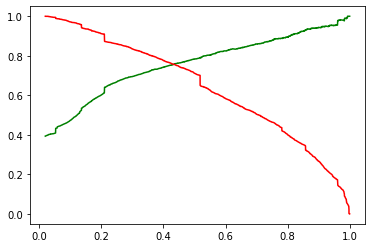

In [391]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [392]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.712847,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.122985,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.615694,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.130329,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.369558,0,1,1,1,1,0,0,0,0,0,0,0


In [393]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.810108644307983

In [394]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3256,  639],
       [ 567, 1889]], dtype=int64)

In [395]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [396]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7472310126582279

In [397]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7691368078175895

<font color= green>___With the current cut off as 0.41 we have Precision around 74% and Recall around 76%___</font>

## 10. Prediction on Test set

In [398]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.175523
1,1,0.888629
2,1,0.988773
3,1,0.883361
4,0,0.120593


In [399]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.175523,0
1,1,0.888629,1
2,1,0.988773,1
3,1,0.883361,1
4,0,0.120593,0
...,...,...,...
2718,1,0.052638,0
2719,0,0.128841,0
2720,0,0.209771,0
2721,1,0.815304,1


In [400]:
y_pred_final[y_pred_final['Conversion_Prob']>=0.85].shape[0]/y_pred_final.shape[0]

0.1457950789570327

In [401]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8094013955196474

In [402]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1454,  290],
       [ 229,  750]], dtype=int64)

In [403]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [404]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7211538461538461

In [405]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7660878447395302

<font color= green>___With the current cut off as 0.41 we have Precision around 73% and Recall around 75%___</font>

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.